# Section 2.1 — Discrete random variables

This notebook contains all the code examples from [Section 2.1 Discrete random variables]() of the **No Bullshit Guide to Statistics**.

Topics covered in this notebook:
- Definitions of discrete random variables
- Examples of random variables
- Probability calculations
- Computer models for random variables 
  - Overview of `scipy.stats.distributions` methods
- Real-world example to demo probability applications
- Discussion
  - Bulk and tails of a distribution


#### Notebook setup

We'll start by importing the Python modules we'll need for this notebook.

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)

%config InlineBackend.figure_format = 'retina'

In [3]:
# set random seed for repeatability
np.random.seed(3)

## Definitions


### Random variables

- *random variable* $X$:
  a quantity that can take on different values.
- **outcome**: a particular value $\{X = x\}$ or range of values $\{a \leq X \leq b\}$ that can occur as a result of observing the random variable $X$.
- **sample space** $\mathcal{X}$: describes the set of all possible outcomes of the random variable.
- $f_X$: the *probability distribution function*
  is a function that assigns probabilities to the different outcome in the sample space of a random variable.
  The probability distribution function of the random variable $X$
  is a function of the form $f_X: \mathcal{X} \to \mathbb{R}$.
- $F_X$:
  the *cumulative distribution function* (CDF) tells us the probability of an outcome
  less than or equal to a given value: $F_X(b) = Pr(\{ X \leq b \})$.
- $\mathbb{E}_X[w(X)]$:
  the *expected value* of the function $w(X)$
  computes the average value of $w(X)$ computed for all the possible values of the random variable $X$.





#### Example 1: coin flip

Consider the random variable $C$ that describes the outcome of a coin flip for a balanced (fair) coin.
The sample space for the random variable $C$ is $\{\texttt{heads}, \texttt{tails}\}$.

The probability mass function is
$$
    f_C(\texttt{heads}) = 0.5
    \quad
    \textrm{and}
    \quad
    f_C(\texttt{tails}) = 0.5.
$$

In [4]:
# define the computer model `rvC` for the random variable C

def fC(c):
    if c in {"heads", "tails"}:
        return 1/2
    else:
        return 0

# print the values of the probability mass function
for c in ["heads", "tails"]:
    print(c, fC(c))

heads 0.5
tails 0.5


#### Example 2: rolling a six-sided die

The random outcome that occurs when we roll a six-sided die can be described as a random variable $D$
which has the sample space $\{1, 2, 3, 4, 5, 6\}$.
If we assume the die is fair,
then each of the outcomes will have equal weight,
so the probability mass function $f_D$ has the following values:

$$
    f_D(1)\!=\!\tfrac{1}{6},
    \ 
    f_D(2)\!=\!\tfrac{1}{6},
    \ 
    f_D(3)\!=\!\tfrac{1}{6},
    \ 
    f_D(4)\!=\!\tfrac{1}{6},
    \ 
    f_D(5)\!=\!\tfrac{1}{6},
    \ 
    f_D(6)\!=\!\tfrac{1}{6}.
$$

In [5]:
# define the computer model `rvD` for the random variable D

def fD(d):
    if d in {1,2,3,4,5,6}:
        return 1/6
    else:
        return 0

# print the values of probability mass function
for d in range(1,7):
    print(d, fD(d))

1 0.16666666666666666
2 0.16666666666666666
3 0.16666666666666666
4 0.16666666666666666
5 0.16666666666666666
6 0.16666666666666666


#### Example 3: hard disk failures

$$
    f_H(h) = \frac{\lambda^{h}e^{-\lambda }}{h!}, \ \ \textrm{for }  h \in \{0, 1, 2, 3, \ldots \},
$$

In [6]:
import numpy as np

def fH(h, lam=20):
    return lam**h * np.exp(-lam) / np.math.factorial(h)


In [7]:
fH(23)

0.06688147366240181

In [8]:
sum([fH(h) for h in range(0,100)])

1.0

In [9]:
sum([fH(h) for h in range(15,25+1)])

0.7829507461740455

## Calculations with random variables

### Example 4: expected winnings from the die game


In [10]:
def w(d):
    if d == 6:
        return 5
    else:
        return 0

# expected value of w(D)
sum([w(d)*fD(d) for d in range(1,7)])

0.8333333333333333

### Example 5: mean and variance of six-sided die


#### Mean

The formula for the mean is given by:
$$
  \mu_D \ = \ \mathbb{E}_D[D] = \sum_{d=1}^{6}  d \cdot f_{D}(d).
$$

In code, this gives:

In [11]:
sum([d*fD(d) for d in range(1,7)])

3.5

So the mean is $\mu_D = \frac{21}{6} = 3.5$.

#### Variance

The formula for the variance is
$$
    \sigma_D^2
        = \mathbb{E}_D\!\left[ (D-\mu_D)^2 \right]
        = \sum_{d=1}^{6} \; (d-3.5)^2 \cdot f_D(d).
$$

In [12]:
sum([(d-3.5)**2 * fD(d) for d in range(1,7)])

2.9166666666666665

So the variance of $D$ is $\sigma_D^2 = 2.9166666666666665$.

We can compute the standard deviation $\sigma_D$ by taking the square root of the variance.

In [13]:
import numpy as np
np.sqrt(2.9166666666666665)

1.707825127659933

### Example 6: mean and variance of hard disks failures


#### Mean

The formula for the mean is given by:
$$
  \mu_H \ = \ \mathbb{E}_H[H] = \sum_{h=0}^{\infty}  h \cdot f_{H}(h).
$$

In code, it is not practical to compute the summation until infinity,
so we'll use an upper limit of $d=100$ instead.

In [14]:
sum([h*fH(h) for h in range(0,100)])

20.0

So the mean is $\mu_H = 20.0$.
Indeed, this is what we expect since we constructed this random variable with mean parameters $\lambda=20$.

#### Variance

The formula for the variance is
$$
    \sigma_H^2
        = \mathbb{E}_H\!\left[ (H-\mu_H)^2 \right]
        = \sum_{h=0}^{\infty} (h-20)^2 \cdot f_H(h).
$$

In [15]:
sum([(h-20)**2 * fH(h) for h in range(0,100)])

19.999999999999996

Due to numerical inaccuracies in the above computation, we end up with a number that is slightly smaller (in the 15th decimal) than the correct answer, which is $20$.
Indeed, the variance of $H$ is $\sigma_H^2 = 20$.

We can compute the standard deviation $\sigma_H$ by taking the square root of the variance.

In [16]:
import numpy as np
np.sqrt(20)

4.47213595499958

Intuitively, the $\sigma_H$ tells us the width of distribution is approximately 5,
and the most likely outcomes will be in the interval
$[\mu_H - \sigma_H, \mu_H + \sigma_H] = [15, 25]$.

<a name="computer_models"></a>

## Computer models for random variables

- `<model>`: the family of probability distributions
- `<params>`: parameters of the model—specific value of the control knobs we choose in the general family of distributions to create a particular distribution
- `<model>(<params>)`: a particular instance of probability model created by choosing a model family `<model>` and the model parameters `<params>`.
  - example 1: uniform family of distribution $\mathcal{U}(\alpha,\beta)$ with parameters $\alpha$ and $\beta$.  
  - example 2: normal family of distribution $\mathcal{N}(\mu,\sigma)$ with parameters $\mu$ and $\sigma$.
- $\sim$: math shorthand symbol that stands for "is distributed according to."
  For example $X \sim \texttt{model}(\theta)$ means the random variable $X$
  is distributed according to model instance $\texttt{model}$ and parameters $\theta$.


In [17]:
from scipy.stats.distributions import poisson

# create a Poisson random variable with mean 20
rvH = poisson(20)

In [18]:
type(rvH)

scipy.stats._distn_infrastructure.rv_frozen

### Compute probabilities of simple outcomes

In [19]:
rvH.pmf(20)

0.0888353173920848

In [20]:
rvH.pmf(21)

0.08460506418293791

In [21]:
rvH.pmf(22)

0.07691369471176195

### Properties of the distribution

In [22]:
rvH.mean()

20.0

In [23]:
rvH.std()

4.47213595499958

In [24]:
np.sqrt( rvH.var() )  # = rvH.std()

4.47213595499958

In [25]:
rvH.median()

20.0

In [26]:
# the limits of the sample space
rvH.support()

(0, inf)

### Computing probabilities of complex outcomes

Suppose you want to compute the probability of the outcome $\{ a \leq N \leq b \}$
for the random variable $H$.

In [27]:
# Pr({15 <= H <= 25}) = sum of f_H between 15 and 25
sum([rvH.pmf(x) for x in range(15, 25+1)])

0.782950746174042

In [28]:
# Pr({15 <= H <= 25}) = F_H(25) - F_H(14)
rvH.cdf(25) - rvH.cdf(14)

0.7829507461740455

### Plotting the probability mass function

<StemContainer object of 3 artists>

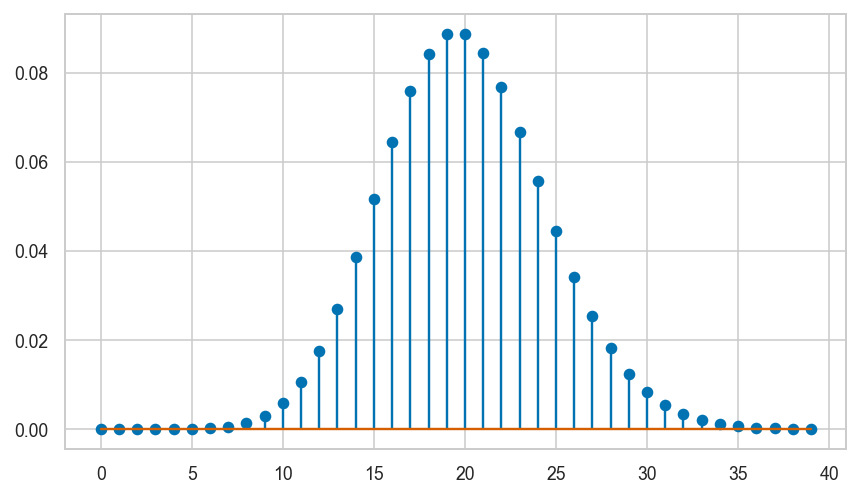

In [29]:
import matplotlib.pyplot as plt
import numpy as np
    
hs = np.arange(0, 40)
fHs = rvH.pmf(hs)

plt.stem(fHs)

In [30]:
# filename = "figures/pmf_plot_poisson_mu20.pdf"

# fig, ax = plt.subplots()
# ax.stem(fHs, label="pmf of $H$", basefmt=" ")
# ax.set_xlabel('h')
# ax.set_ylabel('$f_H$')
# ax.legend()
# # plt.title()
# # plt.xticks(hs)
# ax.figure.tight_layout()
# ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


### Computing quantiles

The inverse question is to find the interval $[0, h_q]$ that contains proportion $q$ of the total probability.

For example the $q=0.95$ quantile is located at

In [31]:
# first quartile
rvH.ppf(0.95)

28.0

In [32]:
# verify that Pr({H <= 28)}) > 0.95
rvH.cdf(28)

0.9656664781059899

### Generating random observations

Let's say you want to generate $n=12$ observations from the random variable $H$.
You can do this by calling the method `rvH.rvs(12)`.

In [33]:
rvH.rvs(12)

array([21, 17, 14, 10, 22, 22, 17, 17, 19, 21, 17, 18])

### Computing expectations

Let's say we want to estimate of the total cost she should budget for replacement hard disks, given a base price of \\$200/disk and a bulk discount of \\$150/disk if buying 20 or more disks.

In [34]:
def cost(h):
    if h > 20:
        return 150*h
    else:
        return 200*h

In [35]:
# expected cost of replacement
sum( [cost(h)*rvH.pmf(h) for h in range(0,1000)] )

3470.2572668392268

In [36]:
# alt. expected cost of replacement
vcost = np.vectorize(cost)
rvH.expect(vcost)

3470.2572668392277

#### Cumulative distribution function

The cumulative distribution is the sum of the probability mass function up to given value $b$:

$$
   F_H(b) = \textrm{Pr}(H \leq b) = \sum_{h=0}^{h=b} f_H(h).
$$


<AxesSubplot:>

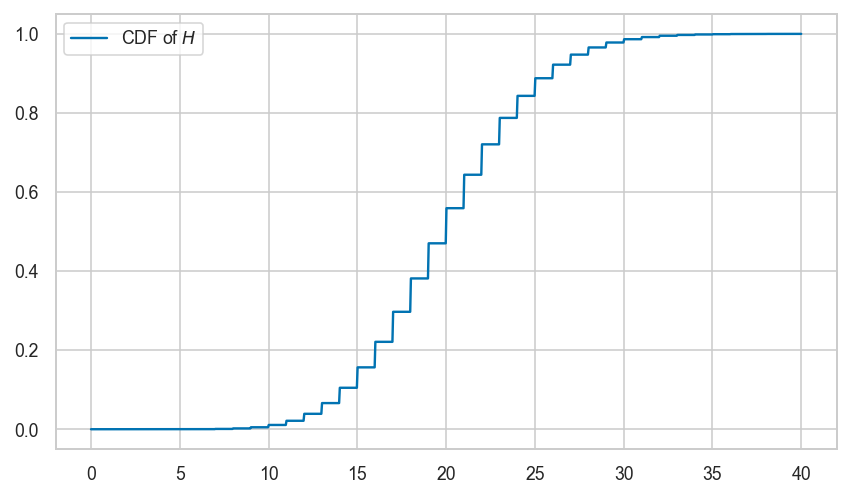

In [37]:
hs = np.linspace(0, 40, 1000)
FHs = rvH.cdf(hs)

sns.lineplot(x=hs, y=FHs, label="CDF of $H$")

## Discussion

### Bulk of the distribution


In [38]:
I_95 = [rvH.ppf(0.025)-1, rvH.ppf(0.975)]
I_95

[11.0, 29.0]

0.9567949608871623

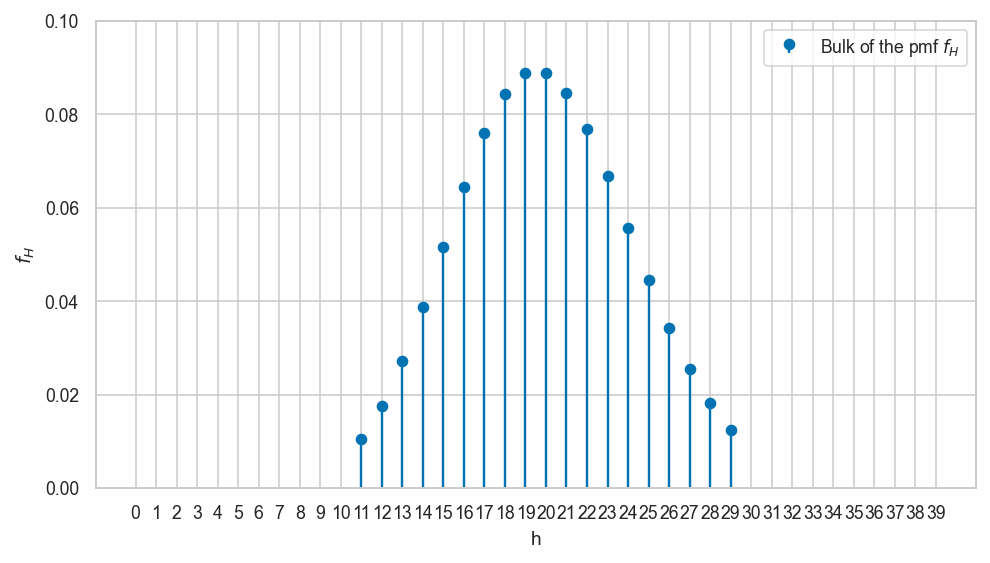

In [39]:
filename = "figures/pmf_plot_poisson_mu20_bulk.pdf"

hs = np.arange(0, 40)
fHs = rvH.pmf(hs)

# mask all non-bulk
fHs[0:int(I_95[0])] = np.nan
fHs[int(I_95[1])+1:] = np.nan


fig, ax = plt.subplots()
ax.stem(fHs, label="Bulk of the pmf $f_H$", basefmt=" ")
ax.set_xlabel('h')
ax.set_ylabel('$f_H$')
ax.set_ylim([0, 0.1])
ax.legend()
# plt.title()
plt.xticks(hs)
ax.figure.tight_layout()
ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

rvH.cdf(I_95[1]) - rvH.cdf(I_95[0])

### Tails of the distribution

#### Left tail

In [40]:
rvH.ppf(0.025)

12.0

#### Right tail

In [41]:
rvH.ppf(0.975)

29.0

0.04320503911283769

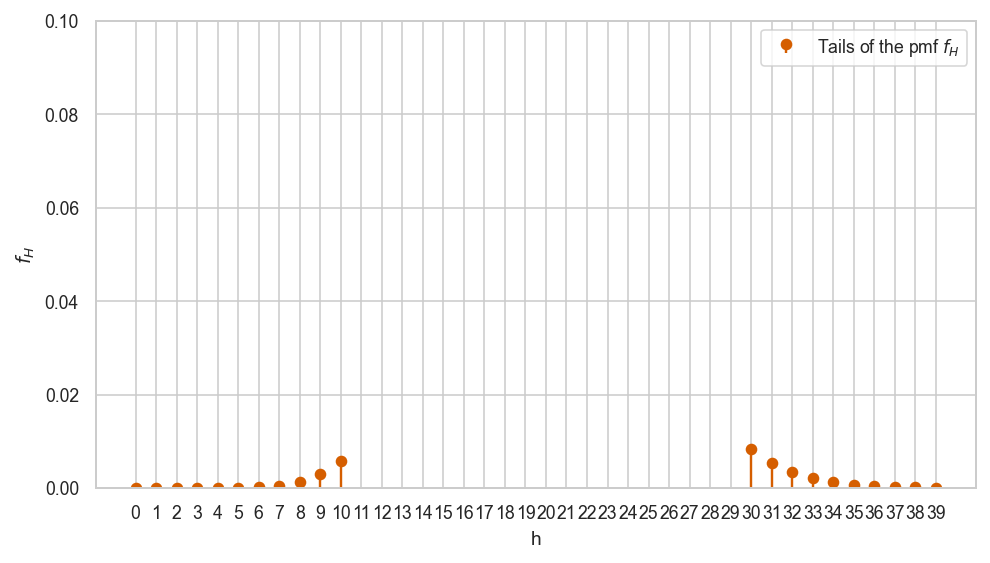

In [42]:
filename = "figures/pmf_plot_poisson_mu20_tails.pdf"

hs = np.arange(0, 40)
fHs = rvH.pmf(hs)

# mask all non-bulk
fHs[int(I_95[0]):int(I_95[1])+1] = np.nan

fig, ax = plt.subplots()
ax.stem(fHs, label="Tails of the pmf $f_H$", markerfmt='ro', linefmt='r-', basefmt=" ")
ax.set_xlabel('h')
ax.set_ylabel('$f_H$')
ax.set_ylim([0, 0.1])
ax.legend()
# plt.title()
plt.xticks(hs)
ax.figure.tight_layout()
ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


(1 - rvH.cdf(I_95[1])) + rvH.cdf(I_95[0])

In [43]:
rvH.ppf(0.000000001)

0.0

In [44]:
from plot_helpers import plot_pmf

<AxesSubplot:xlabel='x', ylabel='$f_X$'>

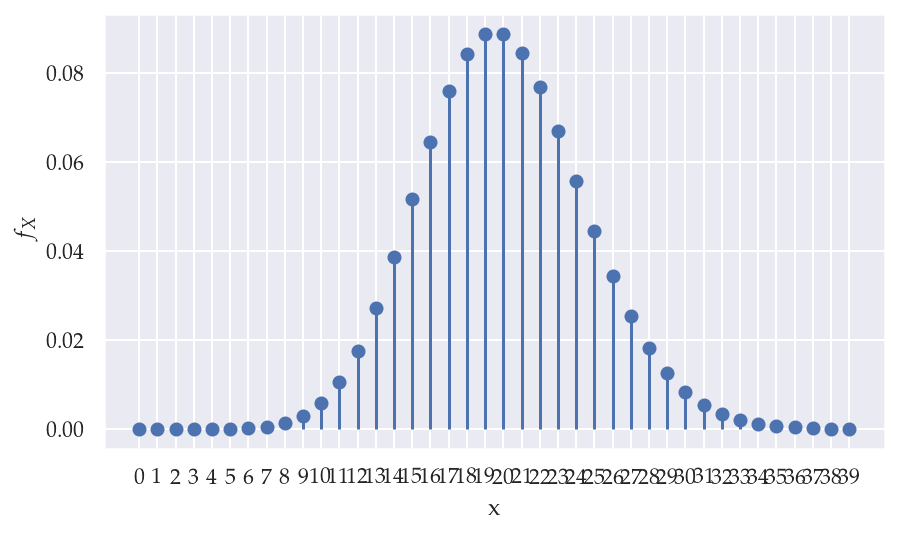

In [45]:
plot_pmf(rvH, xlims=[0,40])